In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp
from scipy.integrate import solve_ivp
from scipy.integrate import trapezoid,simpson
import cmath

In [ ]:
'''Lets set some max and min values!'''
xmin = -2.
xmax = 2.
ymin = -2.
ymax = 2.

In [ ]:
x = np.linspace(xmin,xmax)
y = np.linspace(ymin,ymax)
c=[]
for i in range(0, len(x)):
    for j in range (0, len(y)):
        c.append(np.asarray(complex(x[i],y[j])))
c = np.array(c)

In [ ]:
'''The iteration:'''
def func(c, max_iterations=20):
    z = 0
    for i in range(0, max_iterations):
        z = z**2 + c

    return z

In [ ]:
z = func(c, 7)
r = np.asarray(abs(z))
print(z)
print(r)
diverged = (r>50)

In [ ]:
z = np.asarray(abs(c))

In [ ]:
print(z)
plot_z = (z>50)
print(plot_z)
p = 50
for index, value in enumerate(func(c, 10)):
    z = np.asarray(abs(value))
    z_bool = (z>p)

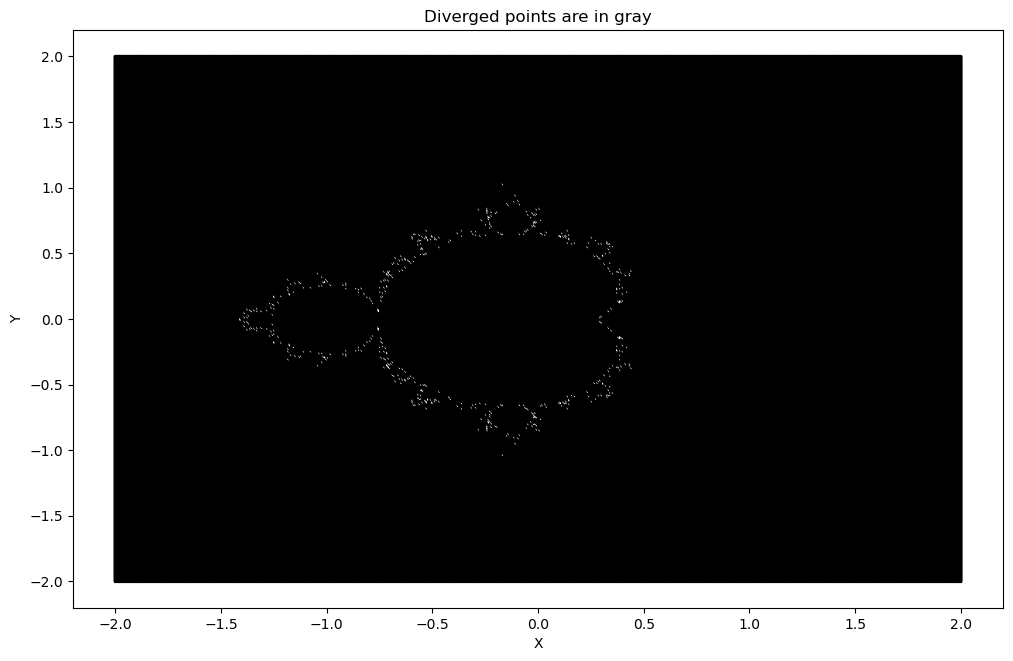

In [4]:
'''Here, I am using numpy and matplotlib to create a scatter plot of the points that diverge/converge'''

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
plt.scatter(np.real(c), np.imag(c), s=2, c = diverged, cmap='gray')
# plt.scatter(np.real(conv_c), np.imag(conv_c), c = 'c')
plt.xlabel("X")
plt.ylabel("Y")
plt.title ("Diverged points are in gray")
plt.show()

/var/folders/3j/jpfkwt9149sdwgtqwp09ydt80000gn/T/ipykernel_3584/3849295951.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ones = np.ones(np.shape(c), np.int)
/var/folders/3j/jpfkwt9149sdwgtqwp09ydt80000gn/T/ipykernel_3584/3849295951.py:16: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
/var/folders/3j/jpfkwt9149sdwgtqwp09ydt80000gn/T/ipykernel_3584/3849295951.py:16: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c
/var/folders/3j/jpfkwt9149sdwgtqwp09ydt80000gn/T/ipykernel_3584/3849295951.py:17: RuntimeWarn

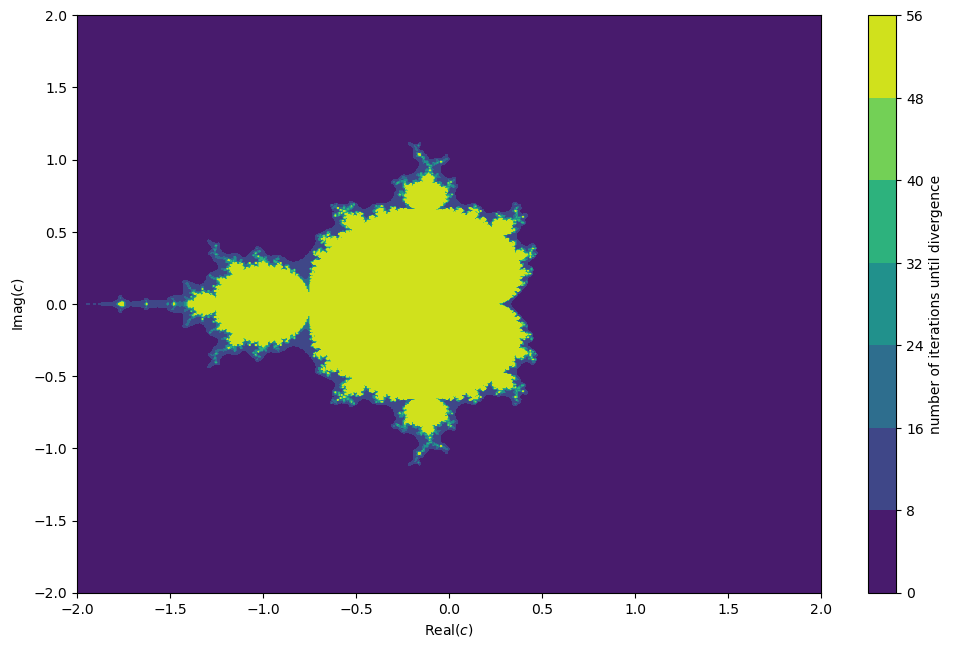

In [3]:
'''I wanted to try out different techniques for the second graph: to plot an image in which points coloured by colour scale show iteration number where the given point diverges:'''

import pylab as plt

# initial values 
loop = 50 # number of interations
div = 600 # divisions
# all possible values of c
c = np.linspace(-2,2,div)[:,np.newaxis] + 1j*np.linspace(-2,2,div)[np.newaxis,:] 

ones = np.ones(np.shape(c), np.int)

color = ones * loop + 5
z = 0
for n in range(0,loop):
      z = z*z + c
      diverged = np.abs(z)>2

      color[diverged] = np.minimum(color[diverged], ones[diverged]*n)

plt.rcParams['figure.figsize'] = [12, 7.5]

plt.contourf(c.real, c.imag, color)
plt.colorbar(label="number of iterations until divergence")
plt.xlabel("Real($c$)")
plt.ylabel("Imag($c$)")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.savefig("plot.png")
plt.show()